In [1]:
import sys
sys.path.append('../')

In [3]:
from data.cosem_jrc_hela_rawdata import load_jrc_hela_rawdata
# Read from /group/jug/USERNAME/bleedthroughsimulation/jrc_hela-3/train-val-test-split/train_jrc_hela-3_bleedthrough_EGFP_Venus_R3.0-3.0_S4_D1_Ex100.0ms.tif (96, 1900, 2800, 3)
raw_datafpath = '/group/jug/USERNAME/bleedthroughsimulation/jrc_choroid-plexus-2/jrc_choroid-plexus-2_bleedthrough_mito_pred_er_pred_EGFP_Venus_R3.0-3.0_S8_D1_Ex50.0ms.tif'
# raw_datafpath = '/group/jug/USERNAME/bleedthroughsimulation/jrc_hela-3/jrc_hela-3/jrc_hela-3_bleedthrough_EGFP_Venus_R3.0-3.0_S4_D1_Ex100.0ms.tif'
# raw_datafpath = '/group/jug/USERNAME/bleedthroughsimulation/jrc_choroid-plexus-2/jrc_choroid-plexus-2_bleedthrough_endo_pred_mito_pred_EGFP_Venus_R3.0-3.0_S2_D1_Ex100.0ms.tif'
# raw_datafpath = '/group/jug/USERNAME/bleedthroughsimulation/jrc_choroid-plexus-2/jrc_choroid-plexus-2_bleedthrough_er_pred_endo_pred_EGFP_Venus_R3.0-3.0_S2_D1_Ex100.0ms.tif'
# raw_datafpath = '/group/jug/USERNAME/bleedthroughsimulation/jrc_choroid-plexus-2/jrc_choroid-plexus-2_bleedthrough_er_pred_mito_pred_EGFP_Venus_R3.0-3.0_S2_D1_Ex100.0ms.tif'
data = load_jrc_hela_rawdata(raw_datafpath)


(400, 2, 450, 930) (400, 450, 930) (400, 450, 930)


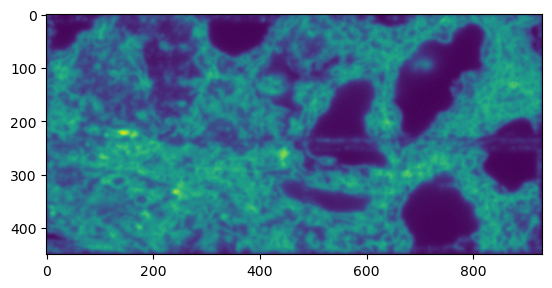

In [8]:
import matplotlib.pyplot as plt
plt.imshow(data[0,:,:,3])
# plt.imshow(data[0,900:,:,1])

In [10]:
data.shape

(400, 450, 930, 4)

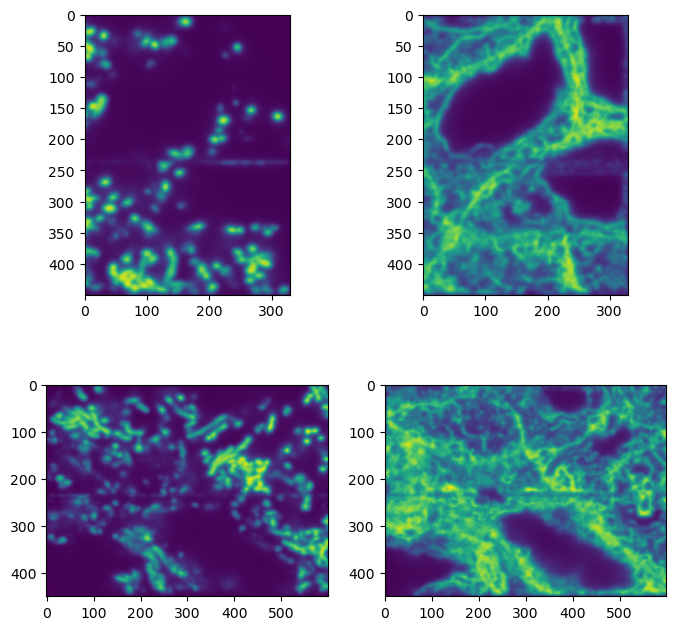

In [12]:
import matplotlib.pyplot as plt
_,ax = plt.subplots(figsize=(8,8),ncols=2,nrows=2)
# idx = 0
# thresh = 900
# ax[0,0].imshow(data[idx,thresh:,:,0])
# ax[0,1].imshow(data[idx,thresh:,:,1])

# ax[1,0].imshow(data[idx,:thresh,:,0])
# ax[1,1].imshow(data[idx,:thresh,:,1])

idx = 100
thresh = 600
ax[0,0].imshow(data[idx,:,thresh:,0])
ax[0,1].imshow(data[idx,:,thresh:,1])

ax[1,0].imshow(data[idx,:,:thresh,0])
ax[1,1].imshow(data[idx,:,:thresh,1])


In [13]:
data[...,0].min(),data[...,0].max(),data[...,1].min(),data[...,1].max()

(98, 918, 99, 549)

In [14]:
import os
outputdir = os.path.dirname(raw_datafpath)
if len(set(outputdir.split('/')[-2:])) == 1:
    outputdir = os.path.dirname(outputdir)


outputdir = os.path.join(outputdir,'train_val_test_split')
os.makedirs(outputdir,exist_ok=True)

print(outputdir)

/group/jug/USERNAME/bleedthroughsimulation/jrc_choroid-plexus-2/train_val_test_split


In [15]:
from disentangle.core.tiff_reader import save_tiff
import os
mid = data.shape[1]//2
train_data = data[:,:,:thresh]
val_data =  data[:,:mid,thresh:]
test_data = data[:,mid:,thresh:]

# train_data = data[:,thresh:]
# val_data = data[:,:thresh,:1400]
# test_data =data[:,:thresh,1400:]

print(train_data.shape, val_data.shape, test_data.shape)
raw_datafname = os.path.basename(raw_datafpath)
train_fpath = os.path.join(outputdir,f'train_{raw_datafname}')
save_tiff(train_fpath,train_data)
save_tiff(os.path.join(outputdir,f'val_{raw_datafname}'),val_data)
save_tiff(os.path.join(outputdir,f'test_{raw_datafname}'),test_data)
print(train_fpath)


(400, 450, 600, 4) (400, 225, 330, 4) (400, 225, 330, 4)


/home/USERNAME.USERNAME/code/Disentangle/disentangle/core/tiff_reader.py:14: UserWarning: /group/jug/USERNAME/bleedthroughsimulation/jrc_choroid-plexus-2/train_val_test_split/train_jrc_choroid-plexus-2_bleedthrough_mito_pred_er_pred_EGFP_Venus_R3.0-3.0_S8_D1_Ex50.0ms.tif is a low contrast image
  imsave(path, data, plugin='tifffile')
/home/USERNAME.USERNAME/code/Disentangle/disentangle/core/tiff_reader.py:14: UserWarning: /group/jug/USERNAME/bleedthroughsimulation/jrc_choroid-plexus-2/train_val_test_split/val_jrc_choroid-plexus-2_bleedthrough_mito_pred_er_pred_EGFP_Venus_R3.0-3.0_S8_D1_Ex50.0ms.tif is a low contrast image
  imsave(path, data, plugin='tifffile')
/home/USERNAME.USERNAME/code/Disentangle/disentangle/core/tiff_reader.py:14: UserWarning: /group/jug/USERNAME/bleedthroughsimulation/jrc_choroid-plexus-2/train_val_test_split/test_jrc_choroid-plexus-2_bleedthrough_mito_pred_er_pred_EGFP_Venus_R3.0-3.0_S8_D1_Ex50.0ms.tif is a low contrast image
  imsave(path, data, plugin='tifffi

/group/jug/USERNAME/bleedthroughsimulation/jrc_choroid-plexus-2/train_val_test_split/train_jrc_choroid-plexus-2_bleedthrough_mito_pred_er_pred_EGFP_Venus_R3.0-3.0_S8_D1_Ex50.0ms.tif


In [13]:
from disentangle.core.tiff_reader import load_tiff
# load_tiff('/group/jug/USERNAME/bleedthroughsimulation/jrc_hela-3/train_val_test_split/train_jrc_hela-3_bleedthrough_EGFP_Venus_R3.0-3.0_S4_D1_Ex100.0ms.tif').shape
# Read from    /group/jug/USERNAME/bleedthroughsimulation/jrc_hela-3/train-val-test-split/val_jrc_hela-3_bleedthrough_EGFP_Venus_R3.0-3.0_S4_D1_Ex100.0ms.tif (96, 1900, 2800, 3)


(96, 1900, 2800, 4)